In [1]:
# UCB1, this looks at the confidence intervals around a mean estimate, and greedily
# samples the machine with the highest value at the edge

In [2]:
%matplotlib notebook
import numpy as np
import pdb
from matplotlib import pyplot as plt
from Bandit import Bandit

In [3]:

def run_experiment(true_means,N):
    bandits = []
    results = np.empty((N,),dtype=np.float16)
    for tm in true_means:
        bandits.extend([Bandit(tm)])
        pass
    
    for n in range(N):    
        i = np.argmax([b.est_mean + np.sqrt(2*np.log(n+1)/(b.N+1)) for b in bandits])
        sample = bandits[i].pull()
        results[n] = sample
        bandits[i].update(sample)
        pass
    
    mean_winnings = np.cumsum(results)/np.arange(1,N+1)
    #plots
    plt.figure()
    plt.plot(mean_winnings)
    for b in bandits:
        plt.fill_between(np.arange(1,N+1),b.est_mean,b.true_mean)
        plt.annotate(str(b.true_mean),xy=(N,b.true_mean))
    pass

<IPython.core.display.Javascript object>


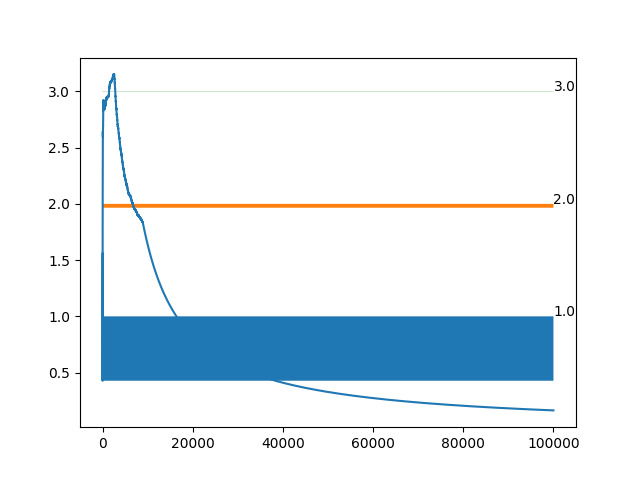

In [6]:
true_means = []
N = 100000

true_means = [1.0,2.0,3.0]
run_experiment(true_means,N)